Number of rows and columns: (1342, 7)
Epoch 1/100
24/24 [==============================] - 3s 109ms/step - loss: 0.0660
Epoch 2/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0171
Epoch 3/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0124
Epoch 4/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0115
Epoch 5/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0111
Epoch 6/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0121
Epoch 7/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0109
Epoch 8/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0097
Epoch 9/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0101
Epoch 10/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0098
Epoch 11/100
24/24 [==============================] - 3s 125ms/step - loss: 0.0099
Epoch 12/100
24/24 [==============================] - 3s 1

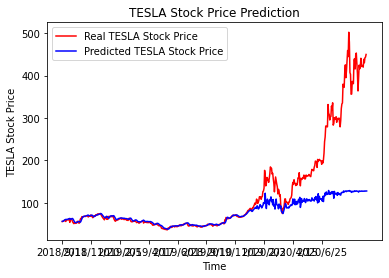

In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

#区分train和test的划分，用Date和Open做预测的信息，Close用作被预测的值 
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

#设置特征-60为时间步长（1天）
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

#建模
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

#建立测试值
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 602):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

#预测
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#可视化
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()


Number of rows and columns: (1342, 7)
(740, 60, 1)
Epoch 1/100
24/24 [==============================] - 3s 126ms/step - loss: 0.0630
Epoch 2/100
24/24 [==============================] - 3s 129ms/step - loss: 0.0164
Epoch 3/100
24/24 [==============================] - 3s 133ms/step - loss: 0.0117
Epoch 4/100
24/24 [==============================] - 3s 130ms/step - loss: 0.0125
Epoch 5/100
24/24 [==============================] - 3s 130ms/step - loss: 0.0104
Epoch 6/100
24/24 [==============================] - 3s 131ms/step - loss: 0.0100
Epoch 7/100
24/24 [==============================] - 3s 130ms/step - loss: 0.0106
Epoch 8/100
24/24 [==============================] - 3s 132ms/step - loss: 0.0140
Epoch 9/100
24/24 [==============================] - 3s 133ms/step - loss: 0.0116
Epoch 10/100
24/24 [==============================] - 3s 130ms/step - loss: 0.0096
Epoch 11/100
24/24 [==============================] - 3s 132ms/step - loss: 0.0091
Epoch 12/100
24/24 [=========================

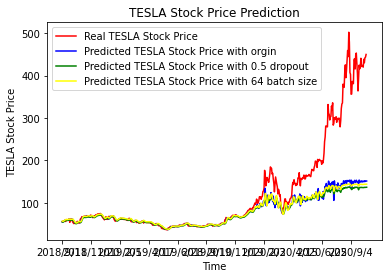

In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)
print(X_train.shape)
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

model1 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model1.add(Dropout(0.5))
# Adding a second LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.5))
# Adding a third LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.5))
# Adding a fourth LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50))
model1.add(Dropout(0.5))
# Adding the output layer
model1.add(Dense(units = 1))

model2 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model2.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50))
model2.add(Dropout(0.2))
# Adding the output layer
model2.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)
model1.fit(X_train, y_train, epochs = 100, batch_size = 32)
model2.fit(X_train, y_train, epochs = 100, batch_size = 64)

# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
y_test = []
for i in range(60, 602):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

predicted_stock_price1 = model1.predict(X_test)
predicted_stock_price1 = sc.inverse_transform(predicted_stock_price1)

predicted_stock_price2 = model2.predict(X_test)
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)

# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
a = df.loc[800:,'Date']
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price with orgin')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price1, color = 'green', label = 'Predicted TESLA Stock Price with 0.5 dropout')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price2, color = 'yellow', label = 'Predicted TESLA Stock Price with 64 batch size')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

Number of rows and columns: (1342, 7)
Epoch 1/100
24/24 [==============================] - 3s 108ms/step - loss: 0.0663
Epoch 2/100
24/24 [==============================] - 3s 112ms/step - loss: 0.0169
Epoch 3/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0141
Epoch 4/100
24/24 [==============================] - 3s 113ms/step - loss: 0.0144
Epoch 5/100
24/24 [==============================] - 3s 114ms/step - loss: 0.0129
Epoch 6/100
24/24 [==============================] - 3s 114ms/step - loss: 0.0117
Epoch 7/100
24/24 [==============================] - 3s 113ms/step - loss: 0.0109
Epoch 8/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0104
Epoch 9/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0124
Epoch 10/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0111
Epoch 11/100
24/24 [==============================] - 3s 112ms/step - loss: 0.0106
Epoch 12/100
24/24 [==============================] - 3s 1

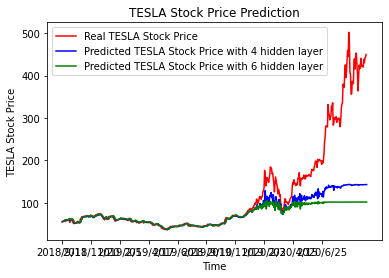

In [17]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

#区分train和test的划分，用Date和Open做预测的信息，Close用作被预测的值 
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

#设置特征-60为时间步长（1天）
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

#建模
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

#建模
model1 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model1.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50))
model1.add(Dropout(0.2))
# Adding the output layer
model1.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)
model1.fit(X_train, y_train, epochs = 100, batch_size = 32)
#建立测试值
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 602):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

#预测
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price1 = model1.predict(X_test)
predicted_stock_price1 = sc.inverse_transform(predicted_stock_price1)
#可视化
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price with 4 hidden layer')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price1, color = 'green', label = 'Predicted TESLA Stock Price with 6 hidden layer')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()


Number of rows and columns: (1342, 7)
Epoch 1/100
24/24 [==============================] - 3s 126ms/step - loss: 0.0617
Epoch 2/100
24/24 [==============================] - 3s 135ms/step - loss: 0.0155
Epoch 3/100
24/24 [==============================] - 3s 133ms/step - loss: 0.0134
Epoch 4/100
24/24 [==============================] - 3s 133ms/step - loss: 0.0136
Epoch 5/100
24/24 [==============================] - 3s 133ms/step - loss: 0.0119
Epoch 6/100
24/24 [==============================] - 3s 131ms/step - loss: 0.0124
Epoch 7/100
24/24 [==============================] - 3s 135ms/step - loss: 0.0135
Epoch 8/100
24/24 [==============================] - 3s 134ms/step - loss: 0.0113
Epoch 9/100
24/24 [==============================] - 3s 137ms/step - loss: 0.0115
Epoch 10/100
24/24 [==============================] - 3s 137ms/step - loss: 0.0093
Epoch 11/100
24/24 [==============================] - 3s 138ms/step - loss: 0.0091
Epoch 12/100
24/24 [==============================] - 3s 1

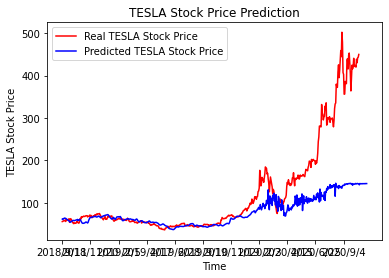

In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
    
df=pd.read_csv("TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
y_test = []
for i in range(60, 602):
    X_test.append(inputs[i-60:i-14, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# (459, 60, 1)

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
a = df.loc[800:,'Date']
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,543,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

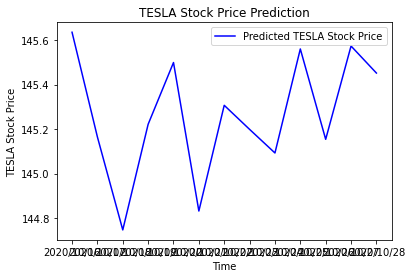

In [ ]:
# Visualising the results
#plt.plot(df.loc[1328:, 'Date'],dataset_test.values[1328:], color = 'red', label = 'Real TESLA Stock Price')
a = df.loc[800:,'Date']
plt.plot(df.loc[1329:, 'Date'],predicted_stock_price[529:543], color = 'blue', label = 'Predicted TESLA Stock Price')
b = range(1,14,1)
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()